<a href="https://colab.research.google.com/github/jplavorr/Math-projects/blob/main/Problema_do_Balde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>Projeto de Numérico</u></h1>

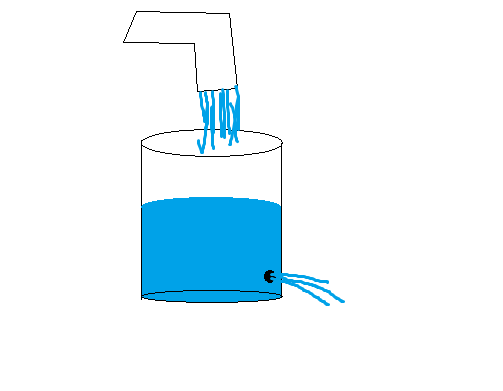

Iremos investigar o tempo que demora para esvaziar/transbordar um tanque cheio de água, usando tecnicas de equações diferenciais derivados à partir de princípios físicos.

A balança de fluxo é dada por: $$V_{in} - V_{out} = V_{dentro}$$



* Para o fluxo entrando no tanque ($V_{in}$), iremos usar a função:

$$\boldsymbol{\phi(t)} = \begin{cases}
    e^{\frac{-1}{1-(t-1)^2}}, \ \, t \ \in \ (0,2) \\ 
    0, \ \ \textrm{se} \ \ t \ge 2
   \end{cases} $$

Logo, a função de abastecimento vai ser: $$ f_i(t) = K\boldsymbol{\phi(t)}$$

Para alguma constante $K$ a ser escolhida no nosso modelo e $i$ é a ordem de abastecimento (no qual iremos escolher posteriormente, de quanto em quanto tempo a torneira é ligada para abastecer o tanque).  



* O fluxo volumétrico $V_{dentro}$ pode ser calculado multiplicando a velocidade pela área do tanque: $$ V_{dentro} = A_t \cdot \dfrac{dh(t)}{dt} $$

* $V_{out}$ é computado multiplicando a velocidade do fluxo pela área do furo ($A_f$)$: $$ V_{out} = A_f \cdot v(t) $$

Onde $v(t)$ é a velocidade da água saindo do furo. Para fluídos de altura h(t) (estamos considerando o primeiro furo com altura = 0), a velocidade da água saindo no furo é: $$ v(t) = \sqrt{2g \cdot h(t)}$$

* Portanto, a equação para $h(t)$ é dada por: $$ -A_f \cdot \sqrt{2g \cdot h(t)} + f_i(t) = A_t \cdot \dfrac{dh(t)}{dt}  $$





 <h1><u>Método de Runge - Kutta</u></h1>

 Vamos usar a vevrsão de quarta ordem do método de Runge-Kutta. Essa versão é amplamente aplicada, devido a sua boa acurácia, pois incluí mais termos da série de taylor. A forma programável é a seguinte:

 $$ K_1 = hy'(x,y)$$
 $$ K_2 = hy'(x + \dfrac{h}{2}, y + \dfrac{1}{2}K_1)$$
 $$ K_3 = hy'(x + \dfrac{h}{2}, y + \dfrac{1}{2}K_2)$$
 $$ K_4 = hy'(x + h, y + K_3)$$

 $$y(x+h) = y(x) + \dfrac{1}{6}(K_1 + 2K_2 + 2K_3 + K_4)$$



#Parte 1

Vamos introduzir o código aplicando na parte mais simples do problema, que seria o problema sem a torneira enchendo o tanque, vamos apenas analisar o tanque e o furo. Sem o abastecimento, podemos concluir que $V_{in} = 0$.
Portanto, temos a seguinte equação: $$-A_f \cdot \sqrt{2g \cdot h(t)} = A_t \cdot \dfrac{dh(t)}{dt} $$

$$ \therefore \dfrac{dh(t)}{dt} = -K \cdot \sqrt{h} \ ; \ \ K = \dfrac{A_f}{A_t} \cdot \sqrt{2g}$$

Se trata de uma EDO simples, cuja solução é: 
$$h(t) = (\sqrt{h_0} - \frac{K \cdot t}{2})^2 $$

Onde $h_0$ é a altura inicial do líquido. 

Vamos analisar numericamente e analiticamente, quando o tanque seca, dado algumas escolhas de parâmetros.

In [ ]:
from math import sin, pi, cos, exp, sqrt

In [ ]:
At = 50  #Area do tanque
Af = At/100  #Area do furo
K = (Af/At)*(20**(0.5))  #Parametro K

x  		 y (RK4) 	 y (analitico)
0.000000 	 30.000000 	 30.000000
0.500000 	 29.877651 	 29.877651
1.000000 	 29.755551 	 29.755551
1.500000 	 29.633702 	 29.633702
2.000000 	 29.512102 	 29.512102
2.500000 	 29.390753 	 29.390753
3.000000 	 29.269653 	 29.269653
3.500000 	 29.148804 	 29.148804
4.000000 	 29.028204 	 29.028204
4.500000 	 28.907855 	 28.907855
5.000000 	 28.787755 	 28.787755
5.500000 	 28.667906 	 28.667906
6.000000 	 28.548306 	 28.548306
6.500000 	 28.428957 	 28.428957
7.000000 	 28.309857 	 28.309857
7.500000 	 28.191008 	 28.191008
8.000000 	 28.072408 	 28.072408
8.500000 	 27.954059 	 27.954059
9.000000 	 27.835959 	 27.835959
9.500000 	 27.718110 	 27.718110
10.000000 	 27.600510 	 27.600510


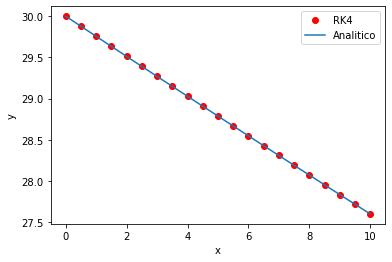

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dy = lambda x,y: -K*(y**(0.5))  #Nossa EDO
f = lambda x: ((30**(0.5)) - (K*x*(0.5)))**2  #Solução analitica da EDO
x = 0                #Inicio do intervalo
xn = 10              #Fim do intervalo
y = 30               #Altura inicial do liquido
h = 0.5
n = int((xn-x)/h)
xp = np.linspace(x,xn,n+1) # vetor x para plotar
fp = f(xp)                  # vetor f(x) para plotar
yp = np.empty(n+1, float) # vetor y para plotar
yp[0] = y
print ('x  \t\t y (RK4) \t y (analitico)')  
print ('%f \t %f \t %f'% (x,y,f(x)))   
# Loop Runge-Kutta
for i in range(1,n+1):
    K1 = h*dy(x, y)
    K2 = h*dy(x + h/2, y + K1/2)
    K3 = h*dy(x + h/2, y + K2/2)
    K4 = h*dy(x +h, y + K3)
    y += (K1 + 2*K2 + 2*K3 + K4)/6
    yp[i] = y
    x += h
    print ('%f \t %f \t %f'% (x,y,f(x)))
# Plot
plt.plot(xp,yp,'ro', xp,fp)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['RK4', 'Analitico'])
plt.show()

Podemos ver claramente que o método de Runge-Kutta se aproxima perfeitamente do método analítico, brincando com o domínio da função, podemos ver que o tanque esvazia para xn = 244 u.t. (pois em 245 ele já acusa raiz negativa).

#Parte 2

Agora vamos modelar o problema com a torneira enchendo o tanque a cada 2 u.t. 

In [ ]:
#Função que soma o quanto é abastecido no intervalo no qual a torneira é aberta.
def O(n):
  x = 0.1     # Valor inicial
  dt = 0.1  # Incremento
  lista = []
  while x < 2:
      s = exp((-1)/(1-((-n + x)**2)))
      x = x + dt
      lista.append(s)
  return sum(lista)
      
    


In [ ]:
#Função que liga a torneira e abastece o tanque a cada 2h.
def A(C,n):  #C nesse caso é a constante que multiplica a função
  if x%2 == 0 and x>0:   #Queremos que seja abastecido a cada 2 u.t. 
    return C*4.439226925640022
  else:
    return 0

In [ ]:
O(1) #A quantidade abastecida quando a torneira é aberta

4.439226925640022

In [ ]:
At = 50
Af = At/150
K = (Af/At)*(20**(0.5))


x  		 y (RK4)
0.000000 	 30.000000
0.500000 	 29.918406
1.000000 	 29.836923
1.500000 	 29.755551
2.000000 	 29.674290
2.500000 	 30.036760
3.000000 	 29.955116
3.500000 	 29.873583
4.000000 	 29.792161
4.500000 	 30.154471
5.000000 	 30.072667
5.500000 	 29.990974
6.000000 	 29.909392
6.500000 	 30.271542
7.000000 	 30.189579
7.500000 	 30.107727
8.000000 	 30.025987
8.500000 	 30.387979
9.000000 	 30.305858
9.500000 	 30.223849
10.000000 	 30.141951


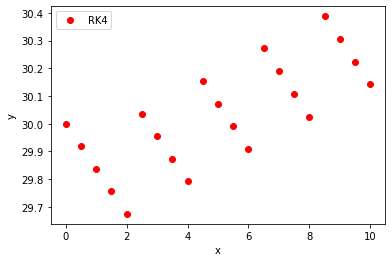

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dy2 = lambda x,y: -K*sqrt(y) + A(10,1)/At
x = 0
xn = 10
y = 30
h = 0.5
n = int((xn-x)/h)
xp = np.linspace(x,xn,n+1) # vetor x para plotar
yp = np.empty(n+1, float) # vetor y para plotar
yp[0] = y
print ('x  \t\t y (RK4)')  
print ('%f \t %f'% (x,y))   
# Loop do Runge-Kutta
for i in range(1,n+1):
    K1 = h*(dy2)(x, y)
    K2 = h*(dy2)(x + h/2, y + K1/2)
    K3 = h*(dy2)(x + h/2, y + K2/2)
    K4 = h*(dy2)(x +h, y + K3)
    y += (K1 + 2*K2 + 2*K3 + K4)/6
    yp[i] = y
    x += h
    print ('%f \t %f'% (x,y))
# Plot
plt.plot(xp,yp,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['RK4'])
plt.show()

Parâmetros escolhidos: 
* Área do Tanque: $A_t = 50$ u.a.
* Área do furo: $A_f = 0.5$ u.a.
* Gravidade: $g=10$
* Altura inicial da coluna d'água: $h_0 = 30$ u.c.
<table bgcolor=" grey"> 
<tr> 
<td> $t$ </td>
<td> $5$ </td>
<td> $10$ </td>
<td> $100$ </td>

</tr> 
<tr>
<td> $h$($t$) </td>
<td> $28.875899$ </td>
<td> $27.774580$ </td>
<td> $12.169741$ </td>
</tr>
</table>

Agora vamos mexer no problema para ver quando o tanque pode esvaziar e quando o tanque pode transbordar:

* Tanque Esvaziar: Podemos ver com os parâmetros anteriores (porém, com $K = 0.1$ (constante que múltiplica a função de abastecimento)) que com o passar do tempo, a coluna de água no tanque diminui, então com esses valores, vamos descobrir quando $h(t) \approx 0$. 
então para $t = 258$, obtemos $h(t) = 0.001512$, então iremos considerar que para $t = 258$ o tanque esvazia.

* Tanque Transbordar: Tentando utilizar valores próximos aos usados anteriormente, vemos que com $K = 10$ e $A_f = 0.33333$, obtemos $t =742.5 \ $, $h(t) =50.333145$ e assim, o tanque transborda.

# Parte 3

Vamos analisar o mesmo problema, porém, levando em conta um segundo furo. O segundo furo pode ser posicionado em uma altura qualquer $0 < h_2 < H$, onde $H$ é a altura do tanque. Vamos usar a equação de bernoulli para detectar a equação da velocidade do furo 2:
$$ \dfrac{\varrho \cdot v(t)^2}{2} + \varrho \cdot gh(t) + p_0 = \dfrac{\varrho \cdot v_2(t)^2}{2} + \varrho \cdot gh_2 + p_0 \\ $$
$$\therefore \ \dfrac{v(t)^2}{2} + g \cdot (h(t) - h_2) = \dfrac{v_2(t)^2}{2} \\ $$
$$\therefore \ v_2 = \sqrt{v(t)^2 + 2g(h(t) - h_2)} $$

Como $v(t) = \sqrt{2gh(t)}$

$$\therefore \ v_2 = \sqrt{2gh(t) + 2g(h(t) - h_2)} = \sqrt{2g(2h(t) - h_2)} $$

Tendo a velocidade, podemos calcular o fluxo do furo 2:

$$ V_{out_2} = A_{f_2} \cdot v_2(t) = A_{f_2} \cdot \sqrt{2g(2h(t) - h_2)} $$

Vamos adicionar essa equação na balança de fluxo:

$$ V_{in} - (V_{out_1} + V_{out_2}) = V_{dentro} \\ $$

$$\therefore \ -(A_{f_1} \cdot \sqrt{2g \cdot h(t)} +  A_{f_2} \cdot \sqrt{2g(2h(t) - h_2)} \  )+ f_i(t) = A_t \cdot \dfrac{dh(t)}{dt}  $$

É a equação que modela o fluxo no tanque com dois furos e um abastecimento. Sofisticando as contas, temos:

$$ \dfrac{dh(t)}{dt} =  -(K_1 \cdot \sqrt{h(t)} +  K_2 \cdot \sqrt{2h(t) - h_2} \  )+ \dfrac{f_i(t)}{A_t} $$

Onde $K_1 = \dfrac{A_{f_1} \cdot \sqrt{2g} }{A_t}$ e $K_2 = \dfrac{A_{f_2} \cdot \sqrt{2g} }{A_t}$


Observação: Se ambos os furos estiverem na mesma altura, a velocidade do fluxo é a mesma.

In [ ]:
#Precisamos garantir que a subtração 2h(t) - h2 não seja negativa.
#De certa forma, se a altura h(t) ficar abaixo do furo 2, voltamos para o problema de apenas 1 furo, i.e. H = 0.
H = 2*y - h2
if H > 0:
  H = H
else:
  H == 0  


In [ ]:
At = 50
Af1 = At/150
Af2 = At/150
G = (Af1/At)*(20**(0.5))
F = (Af2/At)*(20**(0.5))
h2 = 20


x  		 y (RK4)
0.000000 	 30.000000
0.500000 	 29.917047
1.000000 	 29.834208
1.500000 	 29.751481
2.000000 	 29.668867
2.500000 	 30.029986
3.000000 	 29.946992
3.500000 	 29.864112
4.000000 	 29.781344
4.500000 	 30.142310
5.000000 	 30.059164
5.500000 	 29.976130
6.000000 	 29.893210
6.500000 	 30.254024
7.000000 	 30.170726
7.500000 	 30.087541
8.000000 	 30.004470
8.500000 	 30.365132
9.000000 	 30.281684
9.500000 	 30.198349
10.000000 	 30.115127
10.500000 	 30.475639
11.000000 	 30.392042
11.500000 	 30.308557
12.000000 	 30.225186
12.500000 	 30.585550
13.000000 	 30.501804
13.500000 	 30.418171
14.000000 	 30.334651
14.500000 	 30.694867
15.000000 	 30.610975
15.500000 	 30.527195
16.000000 	 30.443528
16.500000 	 30.803597
17.000000 	 30.719558
17.500000 	 30.635632
18.000000 	 30.551819
18.500000 	 30.911742
19.000000 	 30.827558
19.500000 	 30.743487
20.000000 	 30.659529
20.500000 	 31.019308
21.000000 	 30.934980
21.500000 	 30.850764
22.000000 	 30.766662
22.500000 	 31.1

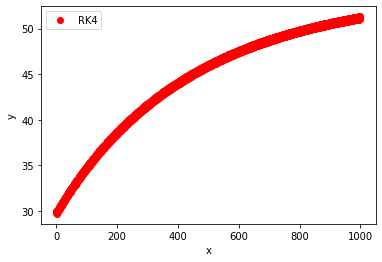

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dy = lambda x,y: -(G*sqrt(y) + F*(H)**(0.5)) + A(10,1)/At
x = 0
xn = 1000
y = 30
h = 0.5
n = int((xn-x)/h)
xp = np.linspace(x,xn,n+1) # vetor x para plotar
yp = np.empty(n+1, float) # vetor y para plotar
yp[0] = y
print ('x  \t\t y (RK4)')  
print ('%f \t %f'% (x,y))   
# Loop do Runge-Kutta
for i in range(1,n+1):
    K1 = h*dy(x, y)
    K2 = h*dy(x + h/2, y + K1/2)
    K3 = h*dy(x + h/2, y + K2/2)
    K4 = h*dy(x +h, y + K3)
    y += (K1 + 2*K2 + 2*K3 + K4)/6
    yp[i] = y
    x += h
    print ('%f \t %f'% (x,y))
# Plot
plt.plot(xp,yp,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['RK4'])
plt.show()

Parâmetros escolhidos: 
* Área do Tanque: $A_t = 50$ u.a.
* Área do furo 1: $A_f = 0.5$ u.a.
* Área do furo 2: $A_f = 0.5$ u.a.
* Gravidade: $g=10$
* Altura inicial da coluna d'água: $h_0 = 30$ u.c.
<table bgcolor=" grey"> 
<tr> 
<td> $t$ </td>
<td> $5$ </td>
<td> $10$ </td>
<td> $100$ </td>

</tr> 
<tr>
<td> $h$($t$) </td>
<td> $28.855715$ </td>
<td> $27.734637$ </td>
<td> $11.856342$ </td>
</tr>
</table>

Agora vamos mexer no problema para ver quando o tanque pode esvaziar e quando o tanque pode transbordar:

* Tanque Esvaziar: Podemos ver com os parâmetros anteriores (porém, com $K = 0.1$ (constante que múltiplica a função de abastecimento)) que com o passar do tempo, a coluna de água no tanque diminui, então com esses valores, vamos descobrir quando $h(t) \approx 0$. 
então para $t = 235.5$, obtemos $h(t) = 0.000355$, então iremos considerar que para $t = 235.5$ o tanque esvazia.

* Tanque Transbordar: Tentando utilizar valores próximos aos usados anteriormente, vemos que com $K = 10$ e $A_{f_1} = A_{f_2} = 0.33333$, obtemos $t =852.5 \ $, $h(t) =50.335931$ e assim, o tanque transborda.